In [2]:
import numpy as np
import matplotlib.pyplot as plt
import turtle as tu


### 1. Árvore 

In [83]:
#Setup
foo = tu.Turtle()
tu.clearscreen()
foo.reset()
foo.left(90)
foo.speed(0)



#arvore em recursão (chamar a função dentro da função)
def draw_tree (l,s) :
    '''desenha uma arvore com comprimento l largura inicial s '''
    if(l<5):
        return
    else:
        foo.pensize(s)
        foo.forward(l)
        foo.left(30)
        draw_tree(l*2/3,np.maximum(1,s*3/4))
        foo.right(60)
        draw_tree(l*2/3,np.maximum(1,s*3/4))
        foo.left(30)
        foo.backward(l)
        

#chamando a função:

draw_tree(100,5)

#
#foo.right(90)
#draw_tree(80)
#
#foo.right(90)
#draw_tree(80)
#
#foo.right(90)
#draw_tree(80)



#### 1.1 Árvore aleatória


In [139]:
#Setup
foo = tu.Turtle()
tu.clearscreen()
foo.reset()
foo.left(90)
foo.penup()
foo.backward(250)
foo.pendown()
foo.speed(0)



#arvore em recursão (chamar a função dentro da função)
def draw_tree (l,s) :
    '''desenha uma arvore com comprimento l largura inicial s '''
    if(l<5):
        return
    else:
        if(s<1.5):
            foo.color('green') #coloca cor nos galhos mais finos que 0.8
        else: 
            foo.color('brown')
            
        foo.pensize(s)
        foo.forward(l)
        foo.left(30)
        draw_tree(l/2 + np.random.sample()*l/2 , np.maximum(1,s*4/5))
        foo.right(60)
        draw_tree(l/2 + np.random.sample()*l/2 , np.maximum(1,s*4/5))
        foo.left(30)
        foo.backward(l)
        
#Chamando a função

draw_tree(60,6)


#foo.exitonclick()
        

Terminator: 

In [ ]:
np.random.sample(0)

### 2. Stacy (quadrados)

In [ ]:
#Setup
#loadWindow = tu.Screen()
#tu.clearscreen()
stacy = tu.Turtle()
stacy.reset()
stacy.speed(0)
stacy.width(10)


#stacy.penup()
#stacy.goto(100,0)
#stacy.pendown()
#stacy.left(90)

#defining the function
def draw_fractal(length):
    
    if length < 5 :
        return
    else:
        stacy.forward(length/2)
        stacy.right(90)
        draw_fractal(length/2)
        stacy.left(180)
        draw_fractal(length/2)
        stacy.right(90)
        stacy.forward(length/2)
        stacy.backward(length)
        
        
#running function
draw_fractal(500)

#exit
#tu.exitonclick()

### 3 Kock Fractal

In [ ]:
tu.clearscreen()
koch = tu.Turtle()
koch.reset()
koch.speed(0)

def Recursive_Koch(lenght, depth):   
    if depth > 0:
        for t in [60, -120, 60, 0]:
            Recursive_Koch(lenght/3 , depth-1)
            koch.left(t)
    else:
        koch.forward(lenght)
        
        

   
    

# ----------
#koch.penup()
#koch.left(90)
#koch.backward(300)
#koch.right(90)
#koch.pendown()

Recursive_Koch(100, 3)

tu.exitonclick()

In [2]:
# Draw a Koch snowflake
from turtle import *

def koch(a, order):
    if order > 0:
        for t in [60, -120, 60, 0]:
            koch(a/3, order - 1)
            left(t)
    else:
        forward(a)

# Test
#reset()
#koch(100, 0)
#pensize(3)
#koch(100, 1)

In [3]:
# Choose colours and size
color("sky blue", "white")
bgcolor("black")
size = 400
order = 0

# Ensure snowflake is centred
penup()
backward(size/1.732)
left(30)
pendown()

# Make it fast
tracer(100)
hideturtle()

begin_fill()

# Three Koch curves
for i in range(3):
    koch(size, order)
    right(120)

end_fill()

# Make the last parts appear
update()

### 4. Mandelbrot Set

In [3]:
def mandelbrot(Re, Im, max_inter):
    c = complex(Re, Im)
    z = 0.0j #definição do conjunto de mandelbrot, para diferentes pontos iniciais veja Julia Sets
 
    if(c.real*c.real + c.imag*c.imag) >= 4:
        return 0 
    else:
        for i in range(max_inter):
            z = z*z + c #processo iterativo para gerar o mandelbrot set
            if(z.real*z.real + z.imag*z.imag) >= 4:
                return i + 1
        return max_inter + 1




In [4]:
columns = 500
rows = 750

result = np.zeros([rows, columns])
for row_index, Re in enumerate(np.linspace(-2, 1 ,num = rows)):
    for column_index, Im in enumerate(np.linspace(-1, 1, num = columns)):
        result[row_index, column_index] = mandelbrot(Re, Im, 50)
        

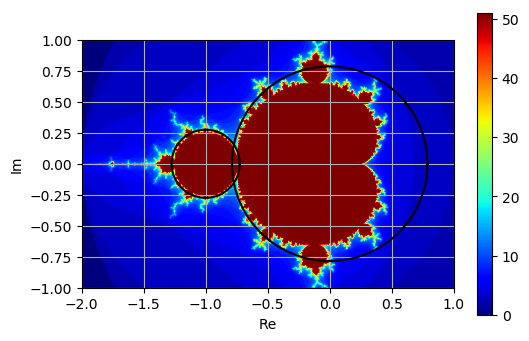

In [10]:
t = np.linspace(0,2*np.pi,60)

circulo_real = 0.7885*np.cos(t)
circulo_imag = 0.7855*np.sin(t)

circulo_real2 = -1 + 0.275*np.cos(t)
circulo_imag2 = 0 + 0.275*np.sin(t)


plt.figure(dpi=100)

plt.imshow(result.T, cmap = 'jet', interpolation = 'bilinear', extent = [-2, 1, -1, 1])
plt.plot(circulo_real,circulo_imag,'k')
plt.plot(circulo_real2,circulo_imag2,'k')
plt.xlabel('Re')
plt.ylabel('Im')
plt.colorbar()
plt.grid()
plt.show()

In [57]:
# encontrando Pi no Mandelbrot set

k=13 #varie k  entre 0 e 13 e veja o que acontece


d = 10**-k
x = 0.25 + d

print(x)
print(mandelbrot(x,0,99999999)*10**(-k/2))
print(np.pi)

0.2500000000001
3.1419815296898865
3.141592653589793


### 5. Julia Sets

In [11]:
def julia(Re_z, Im_z, Re_c, Im_c, max_inter):
    c = complex(Re_c, Im_c)
    z = complex(Re_z, Im_z)
  
    if z.real*z.real + z.imag*z.imag >= 4:
        return 0
    else:
        for i in range(max_inter):
            z = z*z + c #processo iterativo para gerar o julia set
            if(z.real*z.real + z.imag*z.imag) >= 4:
                return i + 1
        return max_inter + 1

In [32]:
columns = 500
rows = 500

#Cada valor de c = Re_c + Im_c.i dará um conjunto de Julia diferente

phi = (1 + np.sqrt(5))/2
#a = np.pi/6
#c = 0.7885*np.exp(complex(0,a))
#c=0.4+0.6j
#c = -0.835 - 0.2321j


result_j = np.zeros([rows, columns, 96])
a = np.zeros(96)

for n in range(96):
    
    a[n] = (np.pi)*(n/95) 
    c = 0.7885*np.exp(complex(0,a[n])) #basta investigar de 0 a pi, pois o conjunto de mandelbrot é simétrico em relação ao eixo Real.
    Re_c = c.real
    Im_c = c.imag
    
    for row_index, Re_z in enumerate(np.linspace(-1.5, 1.5 ,num = rows)):
        for column_index, Im_z in enumerate(np.linspace(-1.5, 1.5, num = columns)):
            result_j[row_index, column_index, n] = julia(Re_z, Im_z, Re_c, Im_c, 50)

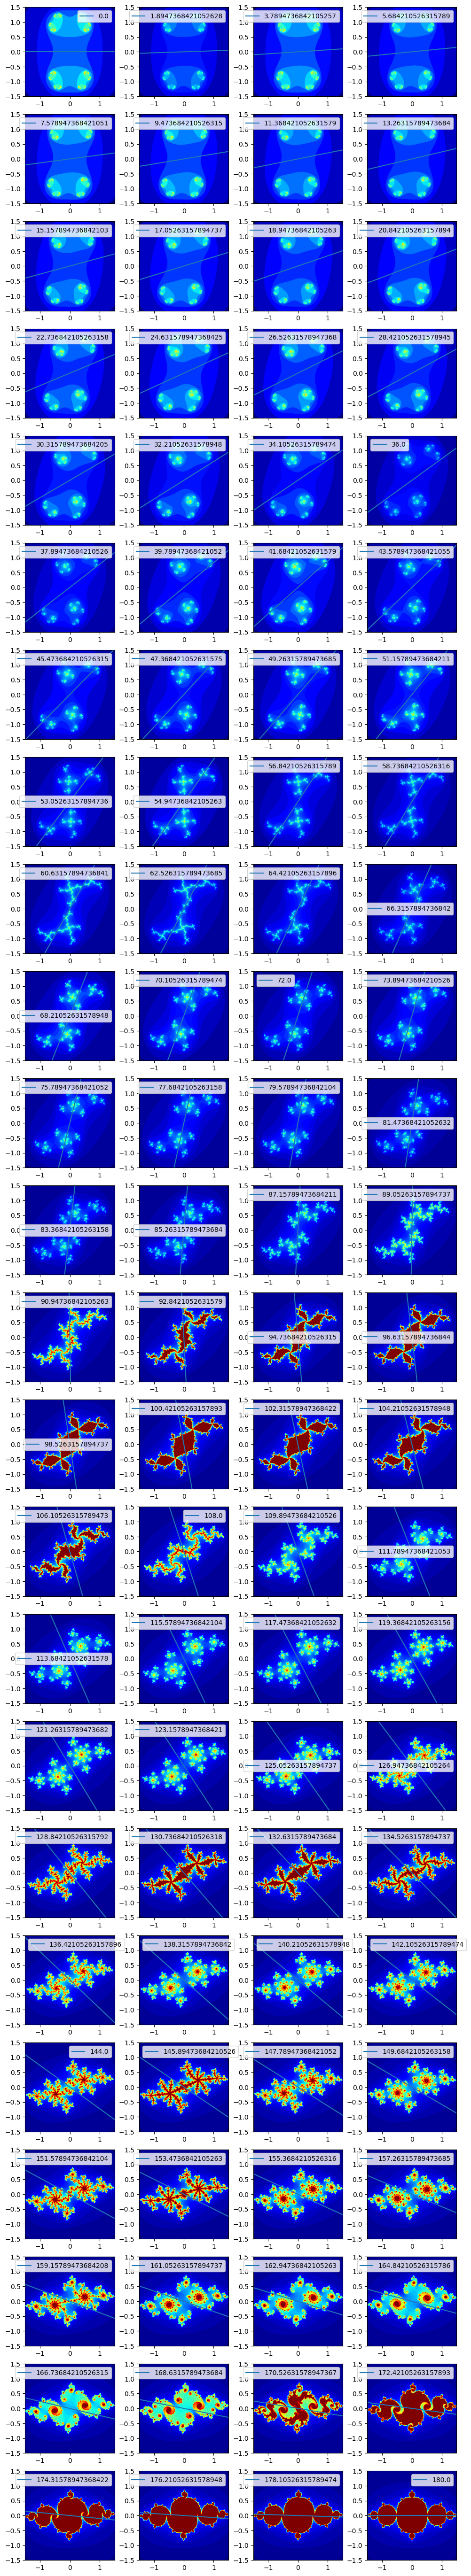

In [68]:
plt.figure(dpi=100, figsize=[12,72])
x = np.linspace(-1.5,1.5)

for n in range(96):
    plt.subplot(24,4,n+1)
    plt.imshow(result_j[:,:,n].T, cmap = 'jet', interpolation = 'bilinear', extent = [-1.5, 1.5, -1.5, 1.5])
    plt.plot(x, np.tan(a[n])*x, label = str(a[n]*180/np.pi))
    plt.ylim(-1.5,1.5)
    #plt.xlabel('Re')
    #plt.ylabel('Im')
    #plt.title('a = ' + str(np.pi*(n/11))
    #plt.colorbar()
    #plt.grid()
    plt.legend()
    
plt.show()

In [14]:
#outro conjunto
columns2 = 500
rows2 = 500

#Cada valor de c = Re_c + Im_c.i dará um conjunto de Julia diferente

result_j2 = np.zeros([rows, columns, 96])
a2 = np.zeros(96)

for n in range(96):
    
    a2[n] = (np.pi)*(n/95) 
    c2 = -1 + 0j + 0.275*np.exp(complex(0,a2[n])) #basta investigar de 0 a pi, pois o conjunto de mandelbrot é simétrico em relação ao eixo Real.
    Re_c2 = c2.real
    Im_c2 = c2.imag
    
    for row_index, Re_z in enumerate(np.linspace(-1.5, 1.5 ,num = rows)):
        for column_index, Im_z in enumerate(np.linspace(-1.5, 1.5, num = columns)):
            result_j2[row_index, column_index, n] = julia(Re_z, Im_z, Re_c2, Im_c2, 50)

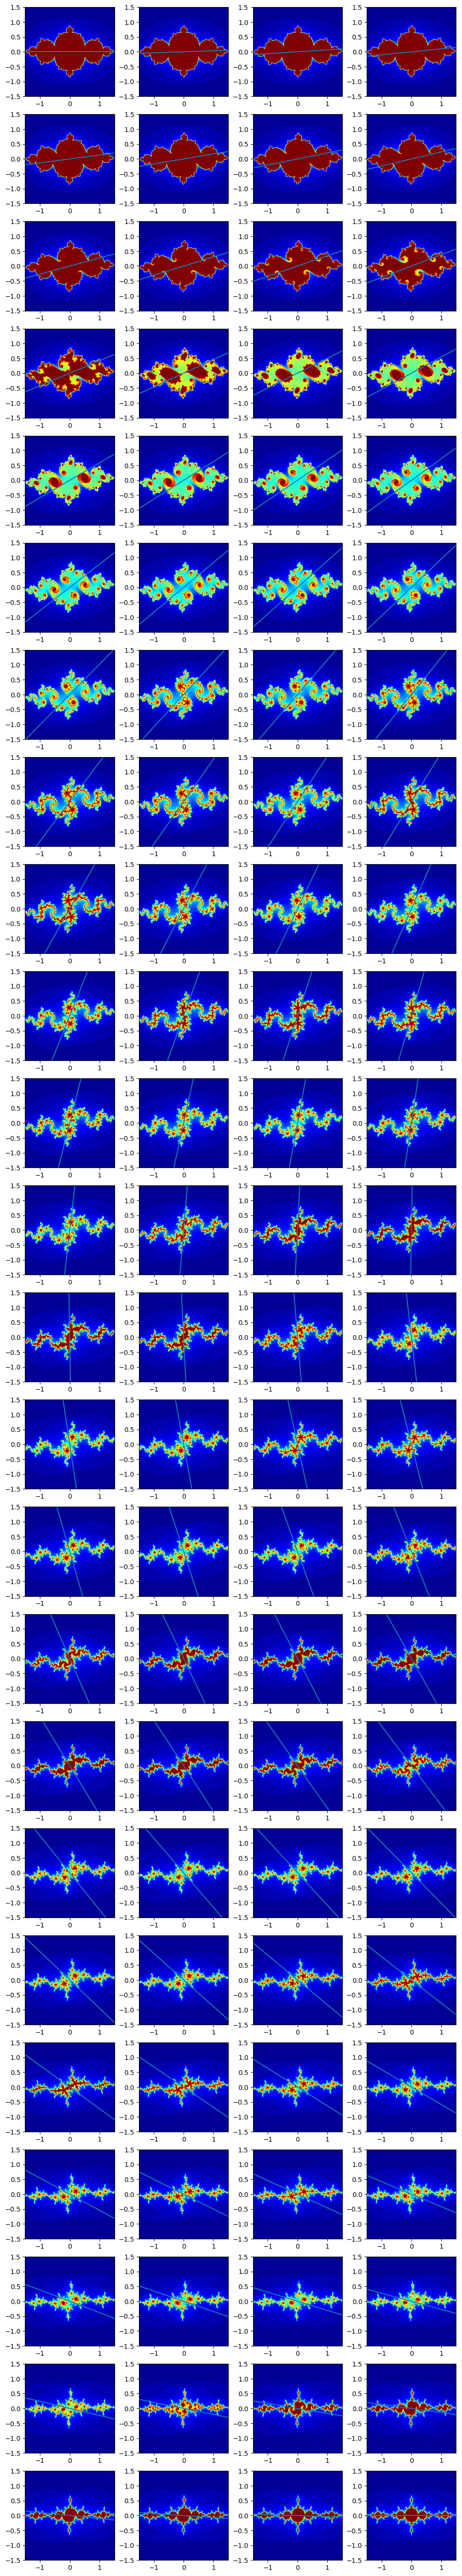

In [17]:
plt.figure(dpi=100, figsize=[12,72])
x = np.linspace(-1.5,1.5)

for n in range(96):
    plt.subplot(24,4,n+1)
    plt.imshow(result_j2[:,:,n].T, cmap = 'jet', interpolation = 'bilinear', extent = [-1.5, 1.5, -1.5, 1.5])
    plt.plot(x, np.tan(a2[n])*x, label = str(a2[n]*180/np.pi))
    plt.ylim(-1.5,1.5)
    #plt.xlabel('Re')
    #plt.ylabel('Im')
    #plt.title('a = ' + str(np.pi*(n/11))
    #plt.colorbar()
    #plt.grid()
    #plt.legend()
    
plt.show()